<a href="https://colab.research.google.com/github/Shinee33/Analisis_Sentimen/blob/main/Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import re

# Baca dataset
df = pd.read_csv('data (6).csv')

In [ ]:
#Menghapus nilai-nilai yang hilang pada kolom 'content'
df['content'].fillna('', inplace=True)

# Handling Duplicate Data
df.drop_duplicates(keep='first', inplace=True)

# Tampilkan beberapa baris pertama dari dataset
print("Contoh beberapa baris dari dataset:")
print(df.head())

Contoh beberapa baris dari dataset:
                               reviewId               userName  \
0  9dc55783-3e61-4b09-b482-db65046994da  Syarif Saqif Ramadhan   
1  dc1537f7-b4d2-47d2-9ca4-0673ee2cc524      Arif HIDAYATULLAH   
2  3f6578eb-6465-4b17-8f7c-0b78e3d58745        nurdin Darmaman   
3  fcf833ca-44e6-43f6-ba0b-cfb22e2a4683                   LORD   
4  0142b09a-05c3-417c-a8e1-85c4d0a753e1           Raga Maulana   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  Sebenarnya sih ga ada masalah yg terlalu mengg...      4            309   
1  untuk gameplay-nya udah bagus klo masalah ngel...      4            293

In [ ]:
jumlah_data_setelah_cleaning = len(df)
print(f'Jumlah data setelah data cleaning: {jumlah_data_setelah_cleaning}')

Jumlah data setelah data cleaning: 1808


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9dc55783-3e61-4b09-b482-db65046994da,Syarif Saqif Ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya sih ga ada masalah yg terlalu mengg...,4,309,1.51.1.2,2023-10-23 15:04:18,NaN,NaN,1.51.1.2
1,dc1537f7-b4d2-47d2-9ca4-0673ee2cc524,Arif HIDAYATULLAH,https://play-lh.googleusercontent.com/a-/ALV-U...,untuk gameplay-nya udah bagus klo masalah ngel...,4,293,1.51.1.2,2023-10-22 15:05:00,NaN,NaN,1.51.1.2
2,3f6578eb-6465-4b17-8f7c-0b78e3d58745,nurdin Darmaman,https://play-lh.googleusercontent.com/a-/ALV-U...,Di dalam game ini hal yang paling menyebalkan ...,4,58,1.51.1.2,2023-11-08 03:33:09,NaN,NaN,1.51.1.2
3,fcf833ca-44e6-43f6-ba0b-cfb22e2a4683,LORD,https://play-lh.googleusercontent.com/a-/ALV-U...,"Game nya sangat bagus , cuman masalah sinyal k...",3,34,1.51.1.2,2023-10-14 09:50:24,NaN,NaN,1.51.1.2
4,0142b09a-05c3-417c-a8e1-85c4d0a753e1,Raga Maulana,https://play-lh.googleusercontent.com/a/ACg8oc...,"server nya parah jaringan naik turun, padahal ...",3,4,1.51.1.2,2023-11-01 22:31:17,NaN,NaN,1.51.1.2


DATA CLEANING

In [ ]:
# Download the 'punkt' resource
nltk.download('punkt')

# Menghapus simbol dan angka menggunakan regular expression
df['content_clean'] = df['content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


# Tampilkan beberapa baris hasil penghapusan simbol dan angka
print("\nHasil Penghapusan Simbol dan Angka:")
print(df['content_clean'].head())


Hasil Penghapusan Simbol dan Angka:
0    Sebenarnya sih ga ada masalah yg terlalu mengg...
1    untuk gameplaynya udah bagus klo masalah ngela...
2    Di dalam game ini hal yang paling menyebalkan ...
3    Game nya sangat bagus  cuman masalah sinyal ke...
4    server nya parah jaringan naik turun padahal s...
Name: content_clean, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_clean
0,9dc55783-3e61-4b09-b482-db65046994da,Syarif Saqif Ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya sih ga ada masalah yg terlalu mengg...,4,309,1.51.1.2,2023-10-23 15:04:18,NaN,NaN,1.51.1.2,Sebenarnya sih ga ada masalah yg terlalu mengg...
1,dc1537f7-b4d2-47d2-9ca4-0673ee2cc524,Arif HIDAYATULLAH,https://play-lh.googleusercontent.com/a-/ALV-U...,untuk gameplay-nya udah bagus klo masalah ngel...,4,293,1.51.1.2,2023-10-22 15:05:00,NaN,NaN,1.51.1.2,untuk gameplaynya udah bagus klo masalah ngela...
2,3f6578eb-6465-4b17-8f7c-0b78e3d58745,nurdin Darmaman,https://play-lh.googleusercontent.com/a-/ALV-U...,Di dalam game ini hal yang paling menyebalkan ...,4,58,1.51.1.2,2023-11-08 03:33:09,NaN,NaN,1.51.1.2,Di dalam game ini hal yang paling menyebalkan ...
3,fcf833ca-44e6-43f6-ba0b-cfb22e2a4683,LORD,https://play-lh.googleusercontent.com/a-/ALV-U...,"Game nya sangat bagus , cuman masalah sinyal k...",3,34,1.51.1.2,2023-10-14 09:50:24,NaN,NaN,1.51.1.2,Game nya sangat bagus cuman masalah sinyal ke...
4,0142b09a-05c3-417c-a8e1-85c4d0a753e1,Raga Maulana,https://play-lh.googleusercontent.com/a/ACg8oc...,"server nya parah jaringan naik turun, padahal ...",3,4,1.51.1.2,2023-11-01 22:31:17,NaN,NaN,1.51.1.2,server nya parah jaringan naik turun padahal s...


In [ ]:
#Menghapus skor 3
df = df[df['score'] != 3]
jumlah_data_setelah = len(df)
print(f'Jumlah data setelah menghapus skor 3: {jumlah_data_setelah} data')

Jumlah data setelah menghapus skor 3: 1518 data


TEXT PREPROCESSING

In [ ]:
# Case Folding
df['content_lower'] = df['content_clean'].apply(lambda x: x.lower())

# Tampilkan beberapa baris hasil case folding
print("\nHasil Case Folding:")
print(df['content_lower'].head())


Hasil Case Folding:
0    sebenarnya sih ga ada masalah yg terlalu mengg...
1    untuk gameplaynya udah bagus klo masalah ngela...
2    di dalam game ini hal yang paling menyebalkan ...
6    assalamualaikum min gamenya bagus mungkin kede...
7    simpletolong atasi maslah sinyal ping bagus ta...
Name: content_lower, dtype: object


<ipython-input-157-a00bd792b535>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_lower'] = df['content_clean'].apply(lambda x: x.lower())


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_clean,content_lower
0,9dc55783-3e61-4b09-b482-db65046994da,Syarif Saqif Ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya sih ga ada masalah yg terlalu mengg...,4,309,1.51.1.2,2023-10-23 15:04:18,NaN,NaN,1.51.1.2,Sebenarnya sih ga ada masalah yg terlalu mengg...,sebenarnya sih ga ada masalah yg terlalu mengg...
1,dc1537f7-b4d2-47d2-9ca4-0673ee2cc524,Arif HIDAYATULLAH,https://play-lh.googleusercontent.com/a-/ALV-U...,untuk gameplay-nya udah bagus klo masalah ngel...,4,293,1.51.1.2,2023-10-22 15:05:00,NaN,NaN,1.51.1.2,untuk gameplaynya udah bagus klo masalah ngela...,untuk gameplaynya udah bagus klo masalah ngela...
2,3f6578eb-6465-4b17-8f7c-0b78e3d58745,nurdin Darmaman,https://play-lh.googleusercontent.com/a-/ALV-U...,Di dalam game ini hal yang paling menyebalkan ...,4,58,1.51.1.2,2023-11-08 03:33:09,NaN,NaN,1.51.1.2,Di dalam game ini hal yang paling menyebalkan ...,di dalam game ini hal yang paling menyebalkan ...
6,d6b2c2ec-8ab0-45b9-a94d-e651c2790bad,Aaron jaya,https://play-lh.googleusercontent.com/a-/ALV-U...,"Assalamualaikum, Min gamenya bagus, mungkin ke...",4,968,1.51.1.2,2023-07-25 03:40:19,NaN,NaN,1.51.1.2,Assalamualaikum Min gamenya bagus mungkin kede...,assalamualaikum min gamenya bagus mungkin kede...
7,eb279386-bcad-4a5e-ba1b-9f94e3d745cd,arie,https://play-lh.googleusercontent.com/a/ACg8oc...,"simple...tolong atasi maslah sinyal, ping bagu...",2,1130,1.51.1.2,2023-07-19 00:44:27,NaN,NaN,1.51.1.2,simpletolong atasi maslah sinyal ping bagus ta...,simpletolong atasi maslah sinyal ping bagus ta...


In [ ]:
# Tokenisasi
df['tokens'] = df['content_lower'].apply(lambda x: word_tokenize(x))

# Tampilkan beberapa baris hasil tokenisasi
print("\nHasil Tokenisasi:")
print(df['tokens'].head())


Hasil Tokenisasi:
0    [sebenarnya, sih, ga, ada, masalah, yg, terlal...
1    [untuk, gameplaynya, udah, bagus, klo, masalah...
2    [di, dalam, game, ini, hal, yang, paling, meny...
6    [assalamualaikum, min, gamenya, bagus, mungkin...
7    [simpletolong, atasi, maslah, sinyal, ping, ba...
Name: tokens, dtype: object


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_clean,content_lower,tokens
0,9dc55783-3e61-4b09-b482-db65046994da,Syarif Saqif Ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya sih ga ada masalah yg terlalu mengg...,4,309,1.51.1.2,2023-10-23 15:04:18,NaN,NaN,1.51.1.2,Sebenarnya sih ga ada masalah yg terlalu mengg...,sebenarnya sih ga ada masalah yg terlalu mengg...,"[sebenarnya, sih, ga, ada, masalah, yg, terlal..."
1,dc1537f7-b4d2-47d2-9ca4-0673ee2cc524,Arif HIDAYATULLAH,https://play-lh.googleusercontent.com/a-/ALV-U...,untuk gameplay-nya udah bagus klo masalah ngel...,4,293,1.51.1.2,2023-10-22 15:05:00,NaN,NaN,1.51.1.2,untuk gameplaynya udah bagus klo masalah ngela...,untuk gameplaynya udah bagus klo masalah ngela...,"[untuk, gameplaynya, udah, bagus, klo, masalah..."
2,3f6578eb-6465-4b17-8f7c-0b78e3d58745,nurdin Darmaman,https://play-lh.googleusercontent.com/a-/ALV-U...,Di dalam game ini hal yang paling menyebalkan ...,4,58,1.51.1.2,2023-11-08 03:33:09,NaN,NaN,1.51.1.2,Di dalam game ini hal yang paling menyebalkan ...,di dalam game ini hal yang paling menyebalkan ...,"[di, dalam, game, ini, hal, yang, paling, meny..."
6,d6b2c2ec-8ab0-45b9-a94d-e651c2790bad,Aaron jaya,https://play-lh.googleusercontent.com/a-/ALV-U...,"Assalamualaikum, Min gamenya bagus, mungkin ke...",4,968,1.51.1.2,2023-07-25 03:40:19,NaN,NaN,1.51.1.2,Assalamualaikum Min gamenya bagus mungkin kede...,assalamualaikum min gamenya bagus mungkin kede...,"[assalamualaikum, min, gamenya, bagus, mungkin..."
7,eb279386-bcad-4a5e-ba1b-9f94e3d745cd,arie,https://play-lh.googleusercontent.com/a/ACg8oc...,"simple...tolong atasi maslah sinyal, ping bagu...",2,1130,1.51.1.2,2023-07-19 00:44:27,NaN,NaN,1.51.1.2,simpletolong atasi maslah sinyal ping bagus ta...,simpletolong atasi maslah sinyal ping bagus ta...,"[simpletolong, atasi, maslah, sinyal, ping, ba..."


In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd

# Kode yang sudah Anda berikan untuk mendapatkan stop words
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

# Membuat kolom baru 'tokens_clean' setelah menghilangkan stop words
df['tokens_clean'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stopwords])

# Tampilkan beberapa baris hasil pembersihan stop words
print("\nHasil Pembersihan Stop Words:")
print(df['tokens_clean'].head())



Hasil Pembersihan Stop Words:
0    [sebenarnya, sih, ga, masalah, yg, terlalu, me...
1    [gameplaynya, udah, bagus, klo, masalah, ngela...
2    [game, paling, menyebalkan, tim, pick, hero, r...
6    [assalamualaikum, min, gamenya, bagus, mungkin...
7    [simpletolong, atasi, maslah, sinyal, ping, ba...
Name: tokens_clean, dtype: object


In [ ]:
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_clean,content_lower,tokens,tokens_clean
0,9dc55783-3e61-4b09-b482-db65046994da,Syarif Saqif Ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya sih ga ada masalah yg terlalu mengg...,4,309,1.51.1.2,2023-10-23 15:04:18,NaN,NaN,1.51.1.2,Sebenarnya sih ga ada masalah yg terlalu mengg...,sebenarnya sih ga ada masalah yg terlalu mengg...,"[sebenarnya, sih, ga, ada, masalah, yg, terlal...","[sebenarnya, sih, ga, masalah, yg, terlalu, me..."
1,dc1537f7-b4d2-47d2-9ca4-0673ee2cc524,Arif HIDAYATULLAH,https://play-lh.googleusercontent.com/a-/ALV-U...,untuk gameplay-nya udah bagus klo masalah ngel...,4,293,1.51.1.2,2023-10-22 15:05:00,NaN,NaN,1.51.1.2,untuk gameplaynya udah bagus klo masalah ngela...,untuk gameplaynya udah bagus klo masalah ngela...,"[untuk, gameplaynya, udah, bagus, klo, masalah...","[gameplaynya, udah, bagus, klo, masalah, ngela..."
2,3f6578eb-6465-4b17-8f7c-0b78e3d58745,nurdin Darmaman,https://play-lh.googleusercontent.com/a-/ALV-U...,Di dalam game ini hal yang paling menyebalkan ...,4,58,1.51.1.2,2023-11-08 03:33:09,NaN,NaN,1.51.1.2,Di dalam game ini hal yang paling menyebalkan ...,di dalam game ini hal yang paling menyebalkan ...,"[di, dalam, game, ini, hal, yang, paling, meny...","[game, paling, menyebalkan, tim, pick, hero, r..."
6,d6b2c2ec-8ab0-45b9-a94d-e651c2790bad,Aaron jaya,https://play-lh.googleusercontent.com/a-/ALV-U...,"Assalamualaikum, Min gamenya bagus, mungkin ke...",4,968,1.51.1.2,2023-07-25 03:40:19,NaN,NaN,1.51.1.2,Assalamualaikum Min gamenya bagus mungkin kede...,assalamualaikum min gamenya bagus mungkin kede...,"[assalamualaikum, min, gamenya, bagus, mungkin...","[assalamualaikum, min, gamenya, bagus, mungkin..."
7,eb279386-bcad-4a5e-ba1b-9f94e3d745cd,arie,https://play-lh.googleusercontent.com/a/ACg8oc...,"simple...tolong atasi maslah sinyal, ping bagu...",2,1130,1.51.1.2,2023-07-19 00:44:27,NaN,NaN,1.51.1.2,simpletolong atasi maslah sinyal ping bagus ta...,simpletolong atasi maslah sinyal ping bagus ta...,"[simpletolong, atasi, maslah, sinyal, ping, ba...","[simpletolong, atasi, maslah, sinyal, ping, ba..."
8,690abbe6-e324-488f-afd0-0983201e0e06,Komang oka Astrawan,https://play-lh.googleusercontent.com/a/ACg8oc...,Game terlalu buruk dalam mendeteksi koneksi ja...,1,63,1.51.1.2,2023-10-21 20:20:54,NaN,NaN,1.51.1.2,Game terlalu buruk dalam mendeteksi koneksi ja...,game terlalu buruk dalam mendeteksi koneksi ja...,"[game, terlalu, buruk, dalam, mendeteksi, kone...","[game, terlalu, buruk, mendeteksi, koneksi, ja..."
9,23b25950-6f4c-4d7d-b837-7a265c224484,Ikan Hias,https://play-lh.googleusercontent.com/a/ACg8oc...,Overal ni game gw anggep bagus dari segi grafi...,4,12,1.51.1.2,2023-11-08 14:09:57,NaN,NaN,1.51.1.2,Overal ni game gw anggep bagus dari segi grafi...,overal ni game gw anggep bagus dari segi grafi...,"[overal, ni, game, gw, anggep, bagus, dari, se...","[overal, ni, game, gw, anggep, bagus, segi, gr..."
10,b8942975-c1d6-4491-8144-09b0060d2bb1,Fauzi Jauhari,https://play-lh.googleusercontent.com/a/ACg8oc...,"Garena.. Tolong di perbaiki ketika solo rank, ...",1,54,1.51.1.2,2023-09-22 17:31:13,NaN,NaN,1.51.1.2,Garena Tolong di perbaiki ketika solo rank mas...,garena tolong di perbaiki ketika solo rank mas...,"[garena, tolong, di, perbaiki, ketika, solo, r...","[garena, perbaiki, solo, rank, masa, iya, kata..."
12,f3e824dc-2d49-44b4-a8e8-8e497435ebd8,Dho,https://play-lh.googleusercontent.com/a-/ALV-U...,Sebenarnya Game ini bagus namun ada yang kuran...,5,1,1.51.1.2,2023-11-12 09:09:57,NaN,NaN,1.51.1.2,Sebenarnya Game ini bagus namun ada yang kuran...,sebenarnya game ini bagus namun ada yang kuran...,"[sebenarnya, game, ini, bagus, namun, ada, yan...","[sebenarnya, game, bagus, kurang, game, terlal..."
13,cfc8d0af-2a81-4d1c-901a-734b089bc14d,Francesco Diano,https://play-lh.googleusercontent.com/a-/ALV-U...,Buat yg mau install game ini mending urungkan ...,1,3

In [ ]:
# Stemming (Menggunakan Porter Stemmer)
ps = PorterStemmer()
df['tokens_stem'] = df['tokens_clean'].apply(lambda x: [ps.stem(word) for word in x])

# Tampilkan beberapa baris hasil stemming
print("\nHasil Stemming:")
print(df['tokens_stem'].head())


Hasil Stemming:
0    [sebenarnya, sih, ga, masalah, yg, terlalu, me...
1    [gameplaynya, udah, bagu, klo, masalah, ngelag...
2    [game, pale, menyebalkan, tim, pick, hero, rol...
6    [assalamualaikum, min, gamenya, bagu, mungkin,...
7    [simpletolong, atasi, maslah, sinyal, ping, ba...
Name: tokens_stem, dtype: object


In [ ]:
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_clean,content_lower,tokens,tokens_clean,tokens_stem
0,9dc55783-3e61-4b09-b482-db65046994da,Syarif Saqif Ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya sih ga ada masalah yg terlalu mengg...,4,309,1.51.1.2,2023-10-23 15:04:18,NaN,NaN,1.51.1.2,Sebenarnya sih ga ada masalah yg terlalu mengg...,sebenarnya sih ga ada masalah yg terlalu mengg...,"[sebenarnya, sih, ga, ada, masalah, yg, terlal...","[sebenarnya, sih, ga, masalah, yg, terlalu, me...","[sebenarnya, sih, ga, masalah, yg, terlalu, me..."
1,dc1537f7-b4d2-47d2-9ca4-0673ee2cc524,Arif HIDAYATULLAH,https://play-lh.googleusercontent.com/a-/ALV-U...,untuk gameplay-nya udah bagus klo masalah ngel...,4,293,1.51.1.2,2023-10-22 15:05:00,NaN,NaN,1.51.1.2,untuk gameplaynya udah bagus klo masalah ngela...,untuk gameplaynya udah bagus klo masalah ngela...,"[untuk, gameplaynya, udah, bagus, klo, masalah...","[gameplaynya, udah, bagus, klo, masalah, ngela...","[gameplaynya, udah, bagu, klo, masalah, ngelag..."
2,3f6578eb-6465-4b17-8f7c-0b78e3d58745,nurdin Darmaman,https://play-lh.googleusercontent.com/a-/ALV-U...,Di dalam game ini hal yang paling menyebalkan ...,4,58,1.51.1.2,2023-11-08 03:33:09,NaN,NaN,1.51.1.2,Di dalam game ini hal yang paling menyebalkan ...,di dalam game ini hal yang paling menyebalkan ...,"[di, dalam, game, ini, hal, yang, paling, meny...","[game, paling, menyebalkan, tim, pick, hero, r...","[game, pale, menyebalkan, tim, pick, hero, rol..."
6,d6b2c2ec-8ab0-45b9-a94d-e651c2790bad,Aaron jaya,https://play-lh.googleusercontent.com/a-/ALV-U...,"Assalamualaikum, Min gamenya bagus, mungkin ke...",4,968,1.51.1.2,2023-07-25 03:40:19,NaN,NaN,1.51.1.2,Assalamualaikum Min gamenya bagus mungkin kede...,assalamualaikum min gamenya bagus mungkin kede...,"[assalamualaikum, min, gamenya, bagus, mungkin...","[assalamualaikum, min, gamenya, bagus, mungkin...","[assalamualaikum, min, gamenya, bagu, mungkin,..."
7,eb279386-bcad-4a5e-ba1b-9f94e3d745cd,arie,https://play-lh.googleusercontent.com/a/ACg8oc...,"simple...tolong atasi maslah sinyal, ping bagu...",2,1130,1.51.1.2,2023-07-19 00:44:27,NaN,NaN,1.51.1.2,simpletolong atasi maslah sinyal ping bagus ta...,simpletolong atasi maslah sinyal ping bagus ta...,"[simpletolong, atasi, maslah, sinyal, ping, ba...","[simpletolong, atasi, maslah, sinyal, ping, ba...","[simpletolong, atasi, maslah, sinyal, ping, ba..."
8,690abbe6-e324-488f-afd0-0983201e0e06,Komang oka Astrawan,https://play-lh.googleusercontent.com/a/ACg8oc...,Game terlalu buruk dalam mendeteksi koneksi ja...,1,63,1.51.1.2,2023-10-21 20:20:54,NaN,NaN,1.51.1.2,Game terlalu buruk dalam mendeteksi koneksi ja...,game terlalu buruk dalam mendeteksi koneksi ja...,"[game, terlalu, buruk, dalam, mendeteksi, kone...","[game, terlalu, buruk, mendeteksi, koneksi, ja...","[game, terlalu, buruk, mendeteksi, koneksi, ja..."
9,23b25950-6f4c-4d7d-b837-7a265c224484,Ikan Hias,https://play-lh.googleusercontent.com/a/ACg8oc...,Overal ni game gw anggep bagus dari segi grafi...,4,12,1.51.1.2,2023-11-08 14:09:57,NaN,NaN,1.51.1.2,Overal ni game gw anggep bagus dari segi grafi...,overal ni game gw anggep bagus dari segi grafi...,"[overal, ni, game, gw, anggep, bagus, dari, se...","[overal, ni, game, gw, anggep, bagus, segi, gr...","[over, ni, game, gw, anggep, bagu, segi, grafi..."
10,b8942975-c1d6-4491-8144-09b0060d2bb1,Fauzi Jauhari,https://play-lh.googleusercontent.com/a/ACg8oc...,"Garena.. Tolong di perbaiki ketika solo rank, ...",1,54,1.51.1.2,2023-09-22 17:31:13,NaN,NaN,1.51.1.2,Garena Tolong di perbaiki ketika solo rank mas...,garena tolong di perbaiki ketika solo rank mas...,"[garena, tolong, di, perbaiki, ketika, solo, r...","[garena, perbaiki, solo, rank, masa, iya, kata...","[garena, perbaiki, solo, rank, masa, iya, kata..."
12,f3e824dc-2d49-44b4-a8e8-8e497435ebd8,Dho,https://play-lh.googleusercontent.com/a-/ALV-U...,Sebenarnya Game ini bagus namun ada

In [ ]:
# Gabungkan semua tokens menjadi satu teks
df['all_text'] = df['tokens_stem'].apply(lambda x: ' '.join(x))


In [ ]:
# Pelabelan sentimen
df['sentiment'] = df['score'].apply(lambda x: 'Positif' if x > 3 else 'Negatif')

# Menampilkan DataFrame setelah preprocessing dan pelabelan
print(df.head())


                               reviewId               userName  \
0  9dc55783-3e61-4b09-b482-db65046994da  Syarif Saqif Ramadhan   
1  dc1537f7-b4d2-47d2-9ca4-0673ee2cc524      Arif HIDAYATULLAH   
2  3f6578eb-6465-4b17-8f7c-0b78e3d58745        nurdin Darmaman   
6  d6b2c2ec-8ab0-45b9-a94d-e651c2790bad             Aaron jaya   
7  eb279386-bcad-4a5e-ba1b-9f94e3d745cd                   arie   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
6  https://play-lh.googleusercontent.com/a-/ALV-U...   
7  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  Sebenarnya sih ga ada masalah yg terlalu mengg...      4            309   
1  untuk gameplay-nya udah bagus klo masalah ngel...      4            293   
2  Di dalam game ini hal yang pa

In [ ]:
# Menentukan jumlah ulasan positif dan negatif
positive_count = df[df['sentiment'] == 'Positif'].shape[0]
negative_count = df[df['sentiment'] == 'Negatif'].shape[0]

# Menampilkan hasil
print("Jumlah ulasan positif:", positive_count)
print("Jumlah ulasan negatif:", negative_count)

Jumlah ulasan positif: 644
Jumlah ulasan negatif: 874


In [ ]:
#Split data
#X_train, X_test, y_train, y_test = train_test_split(df['all_text'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Pisahkan data menjadi data latih dan data uji (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(df['all_text'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
(display)

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [ ]:
# Tampilkan beberapa baris hasil TF-IDF
df_tfidf_display = pd.DataFrame(data=X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("Hasil TF-IDF untuk Data Latih:")
print(df_tfidf_display.head())


Hasil TF-IDF untuk Data Latih:
    ab  abaikan  abang  abi  abisin  abiss  abnorm  abus  abyss  acak  ...  \
0  0.0      0.0    0.0  0.0     0.0    0.0     0.0   0.0    0.0   0.0  ...   
1  0.0      0.0    0.0  0.0     0.0    0.0     0.0   0.0    0.0   0.0  ...   
2  0.0      0.0    0.0  0.0     0.0    0.0     0.0   0.0    0.0   0.0  ...   
3  0.0      0.0    0.0  0.0     0.0    0.0     0.0   0.0    0.0   0.0  ...   
4  0.0      0.0    0.0  0.0     0.0    0.0     0.0   0.0    0.0   0.0  ...   

   youv   ys   yt  ytan  yth  yue  yuk  yutub  zaman  zenfon  
0   0.0  0.0  0.0   0.0  0.0  0.0  0.0    0.0    0.0     0.0  
1   0.0  0.0  0.0   0.0  0.0  0.0  0.0    0.0    0.0     0.0  
2   0.0  0.0  0.0   0.0  0.0  0.0  0.0    0.0    0.0     0.0  
3   0.0  0.0  0.0   0.0  0.0  0.0  0.0    0.0    0.0     0.0  
4   0.0  0.0  0.0   0.0  0.0  0.0  0.0    0.0    0.0     0.0  

[5 rows x 5741 columns]


In [ ]:
# Inisialisasi dan latih model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Prediksi pada data uji
y_pred = naive_bayes.predict(X_test_tfidf)


In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.72      0.94      0.81       181
     Positif       0.84      0.46      0.59       123

    accuracy                           0.74       304
   macro avg       0.78      0.70      0.70       304
weighted avg       0.77      0.74      0.72       304



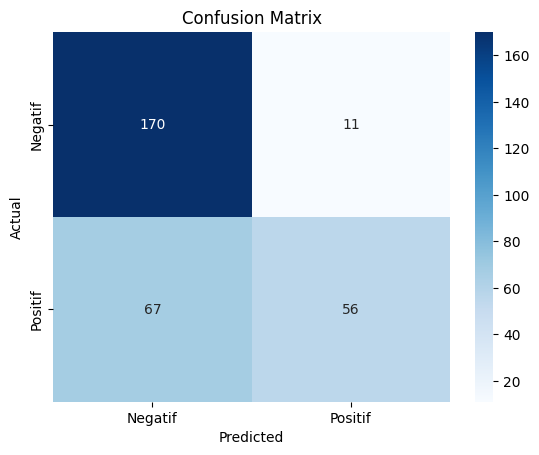

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 74.34%


In [ ]:
# Menghitung jumlah ulasan positif
num_positif = sum(y_test == 'Positif')

In [ ]:
# Menghitung jumlah ulasan negatif
num_negatif = sum(y_test == 'Negatif')

In [ ]:
# Menampilkan jumlah ulasan positif dan negatif
print("Jumlah ulasan positif:", num_positif)
print("Jumlah ulasan negatif:", num_negatif)

Jumlah ulasan positif: 123
Jumlah ulasan negatif: 181


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(naive_bayes, X_train_tfidf, y_train, cv=5)  # Sesuaikan jumlah fold cross-validation
print("Hasil Cross-Validation:")
print(cv_scores)
print(f'Rata-rata Akurasi: {cv_scores.mean():.2f}')

Hasil Cross-Validation:
[0.67901235 0.69547325 0.70781893 0.68312757 0.70247934]
Rata-rata Akurasi: 0.69


In [ ]:
# Menambahkan informasi confusion matrix ke dalam DataFrame utama
df_confusion_matrix_explanation = pd.DataFrame({
    'Metrik': ['True Positif (TP)', 'False Negatif (FN)', 'False Positif (FP)', 'True Negatif (TN)'],
    'Penjelasan': [
        'Jumlah data positif yang benar-benar diprediksi benar',
        'Jumlah data positif yang sebenarnya tetapi diprediksi sebagai negatif',
        'Jumlah data negatif yang sebenarnya tetapi diprediksi sebagai positif',
        'Jumlah data negatif yang benar-benar diprediksi benar'
    ],
    'Jumlah': [cm[1, 1], cm[1, 0], cm[0, 1], cm[0, 0]]
})

# Menambahkan kolom baru ke DataFrame utama
df = pd.concat([df, df_confusion_matrix_explanation], axis=1)

# Menghapus nilai NaN jika ada
df = df.dropna()

# Menampilkan DataFrame dengan informasi confusion matrix
print("DataFrame dengan Informasi Confusion Matrix:")
print(df)